In [13]:

# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

print("✅ Bibliotecas carregadas com sucesso!")

✅ Bibliotecas carregadas com sucesso!


In [14]:

# Carregar dados
df = pd.read_csv('../data/train.csv')
print(f"📊 Dataset carregado: {df.shape[0]} casas, {df.shape[1]} variáveis")

# Selecionar apenas 5 variáveis SIMPLES + target
colunas_simples = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'YearBuilt', 'OverallQual', 'SalePrice']
df_limpo = df[colunas_simples].copy()

# Remover valores nulos (método mais simples)
df_limpo = df_limpo.dropna()
print(f"✅ Após limpeza: {df_limpo.shape[0]} casas")

# Mostrar informações básicas
print("\n📋 INFORMAÇÕES DO DATASET:")
print(df_limpo.info())
print("\n📊 ESTATÍSTICAS:")
print(df_limpo.describe())

📊 Dataset carregado: 1460 casas, 81 variáveis
✅ Após limpeza: 1460 casas

📋 INFORMAÇÕES DO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
 2   FullBath      1460 non-null   int64
 3   YearBuilt     1460 non-null   int64
 4   OverallQual   1460 non-null   int64
 5   SalePrice     1460 non-null   int64
dtypes: int64(6)
memory usage: 68.6 KB
None

📊 ESTATÍSTICAS:
         GrLivArea  BedroomAbvGr     FullBath    YearBuilt  OverallQual  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1515.463699      2.866438     1.565068  1971.267808     6.099315   
std     525.480383      0.815778     0.550916    30.202904     1.382997   
min     334.000000      0.000000     0.000000  1872.000000     1.000000   
25%    1129.500000      2.0000

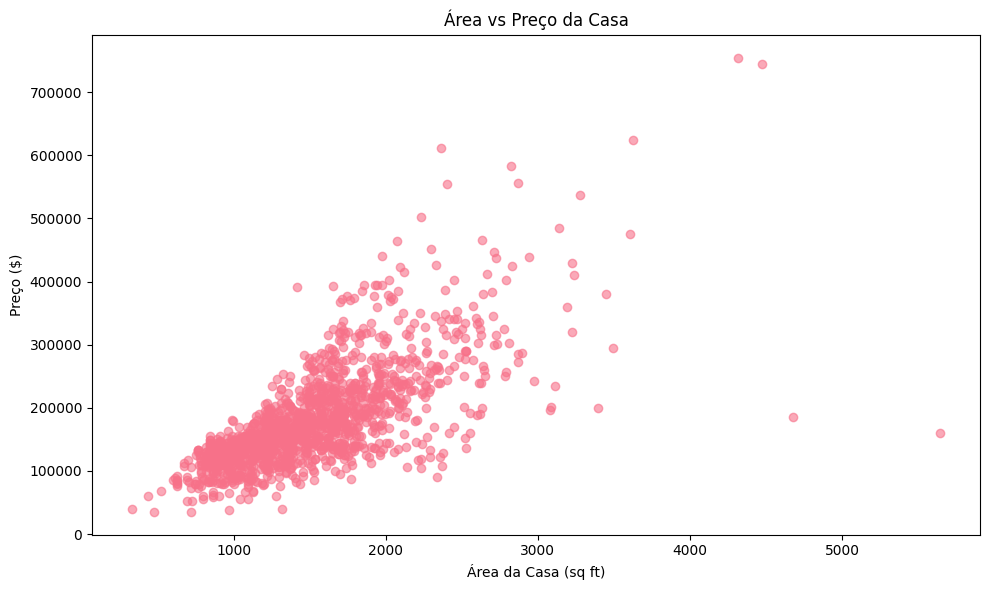

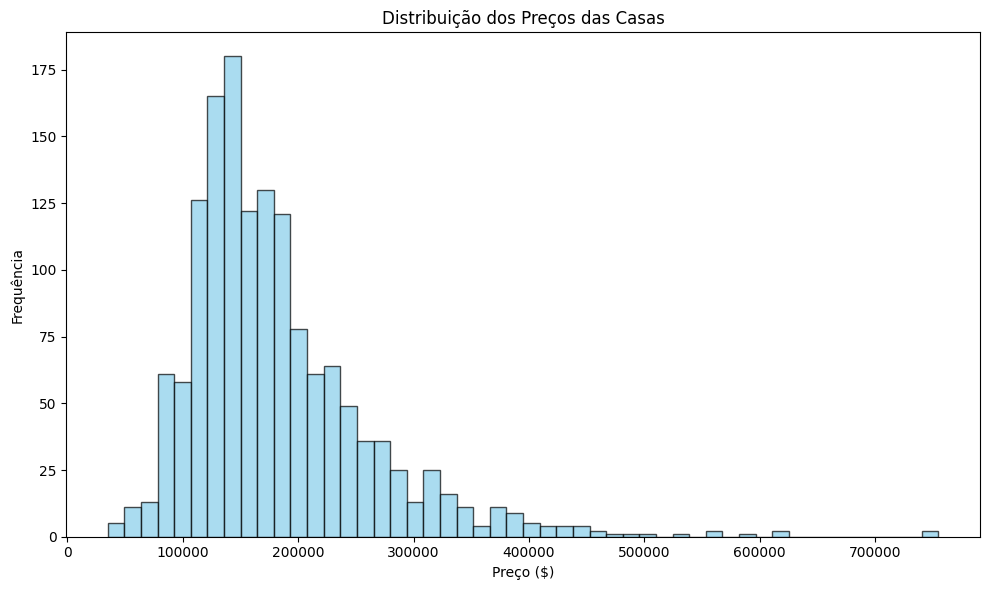

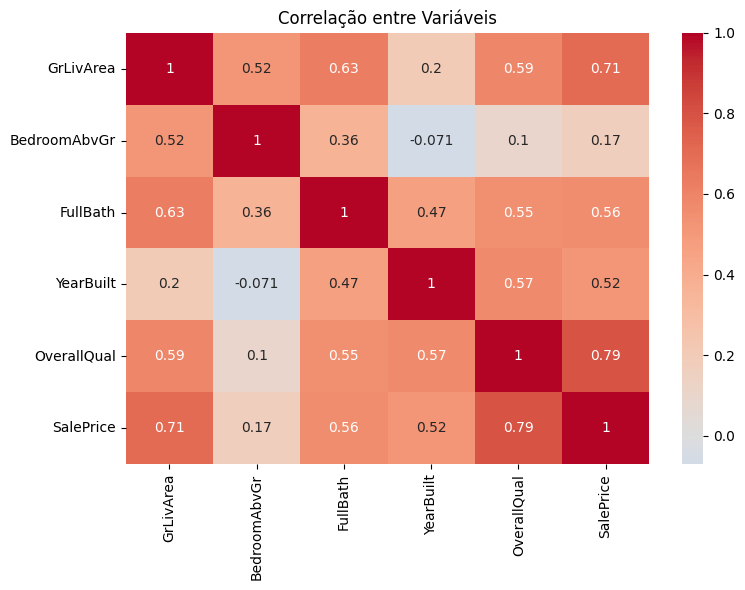

✅ Gráficos salvos na pasta img/


In [15]:

# Configurar estilo dos gráficos
plt.style.use('default')
sns.set_palette("husl")

# GRÁFICO 1: Área vs Preço
plt.figure(figsize=(10, 6))
plt.scatter(df_limpo['GrLivArea'], df_limpo['SalePrice'], alpha=0.6)
plt.xlabel('Área da Casa (sq ft)')
plt.ylabel('Preço ($)')
plt.title('Área vs Preço da Casa')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('../img/area_vs_preco.png', dpi=300, bbox_inches='tight')
plt.show()

# GRÁFICO 2: Distribuição de Preços
plt.figure(figsize=(10, 6))
plt.hist(df_limpo['SalePrice'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')
plt.title('Distribuição dos Preços das Casas')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.savefig('../img/distribuicao_precos.png', dpi=300, bbox_inches='tight')
plt.show()

# GRÁFICO 3: Correlação entre variáveis
plt.figure(figsize=(8, 6))
correlation_matrix = df_limpo.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlação entre Variáveis')
plt.tight_layout()
plt.savefig('../img/correlacao.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráficos salvos na pasta img/")

In [16]:

# Preparar dados para o modelo
X = df_limpo[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'YearBuilt', 'OverallQual']]
y = df_limpo['SalePrice']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📊 Dados de treino: {X_train.shape[0]} casas")
print(f"📊 Dados de teste: {X_test.shape[0]} casas")

# Treinar modelo (Regressão Linear - o mais simples)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliar modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n🎯 RESULTADOS DO MODELO:")
print(f"RMSE: ${rmse:,.2f}")
print(f"R²: {r2:.3f} ({r2*100:.1f}% de precisão)")

# Salvar modelo
joblib.dump(modelo, '../models/house_price_model.pkl')


📊 Dados de treino: 1168 casas
📊 Dados de teste: 292 casas

🎯 RESULTADOS DO MODELO:
RMSE: $41,891.41
R²: 0.771 (77.1% de precisão)


['../models/house_price_model.pkl']

In [17]:
# ===========================================
# 4. EXEMPLO DE PREVISÃO
# ===========================================

# Exemplo: prever preço de uma casa
casa_exemplo = [[2000, 3, 2, 2010, 7]]  # Área, quartos, banheiros, ano, qualidade
preco_previsto = modelo.predict(casa_exemplo)[0]

print(f"\n🏠 EXEMPLO DE PREVISÃO:")
print(f"Casa: 2000 sq ft, 3 quartos, 2 banheiros, ano 2010, qualidade 7")
print(f"Preço previsto: ${preco_previsto:,.2f}")


🏠 EXEMPLO DE PREVISÃO:
Casa: 2000 sq ft, 3 quartos, 2 banheiros, ano 2010, qualidade 7
Preço previsto: $253,819.42



🔍 ENCONTRADAS 3 CASAS SIMILARES NO DATASET:
📊 COMPARAÇÃO DETALHADA:
 Área  Quartos  Banheiros  Ano  Qualidade Preço_Real Preço_Previsto Diferença  Erro_%
 1968        4          2 2009          8   $269,500       $264,541    $4,959     1.8
 1863        4          2 2006          7   $219,210       $232,310  $-13,100    -6.0
 1933        4          2 2007          6   $214,000       $215,004   $-1,004    -0.5

📈 ANÁLISE DE PRECISÃO:
• Erro médio absoluto: $6,354
• Erro percentual médio: 2.8%
• Preço real médio: $234,237
• Preço previsto médio: $237,285


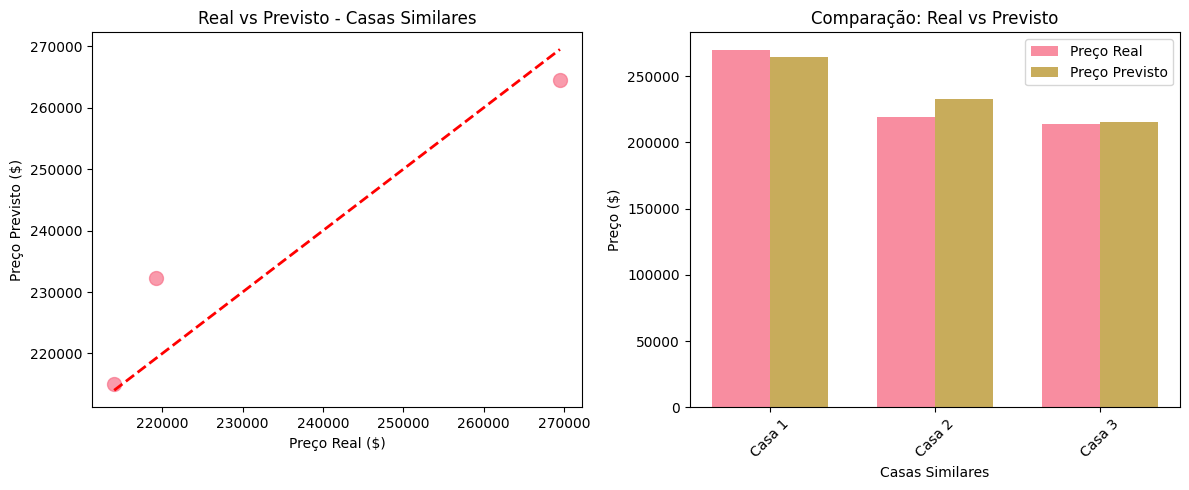

✅ Gráfico de comparação salvo em img/real_vs_previsto.png

🎯 MELHOR PREVISÃO:
• Casa 3: Real $214,000 | Previsto $215,004
• Diferença: $-1,004 (-0.5%)

❌ MAIOR ERRO:
• Casa 2: Real $219,210 | Previsto $232,310
• Diferença: $-13,100 (-6.0%)



In [21]:

# Buscar casas similares no dataset original para comparar
casas_similares = df_limpo[
    (df_limpo['GrLivArea'].between(1800, 2200)) &  # Área similar
    (df_limpo['BedroomAbvGr'] == 4) &              # Mesmo número de quartos
    (df_limpo['FullBath'] == 2) &                  # Mesmo número de banheiros
    (df_limpo['YearBuilt'].between(2005, 2015)) &  # Ano similar
    (df_limpo['OverallQual'].between(6, 8))        # Qualidade similar
].head(10)  # Pegar até 10 casas similares

if len(casas_similares) > 0:
    print(f"\n🔍 ENCONTRADAS {len(casas_similares)} CASAS SIMILARES NO DATASET:")
    print("="*80)
    
    # Fazer previsões para as casas similares
    X_similares = casas_similares[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'YearBuilt', 'OverallQual']]
    precos_previstos = modelo.predict(X_similares)
    precos_reais = casas_similares['SalePrice'].values
    
    # Criar dataframe de comparação
    comparacao = pd.DataFrame({
        'Área': casas_similares['GrLivArea'].values,
        'Quartos': casas_similares['BedroomAbvGr'].values,
        'Banheiros': casas_similares['FullBath'].values,
        'Ano': casas_similares['YearBuilt'].values,
        'Qualidade': casas_similares['OverallQual'].values,
        'Preço_Real': precos_reais,
        'Preço_Previsto': precos_previstos,
        'Diferença': precos_reais - precos_previstos,
        'Erro_%': ((precos_reais - precos_previstos) / precos_reais * 100).round(1)
    })
    
    print("📊 COMPARAÇÃO DETALHADA:")
    print(comparacao.to_string(index=False, formatters={
        'Preço_Real': '${:,.0f}'.format,
        'Preço_Previsto': '${:,.0f}'.format,
        'Diferença': '${:,.0f}'.format
    }))
    
    # Estatísticas da comparação
    erro_medio = np.mean(np.abs(comparacao['Diferença']))
    erro_percentual_medio = np.mean(np.abs(comparacao['Erro_%']))
    
    print(f"\n📈 ANÁLISE DE PRECISÃO:")
    print(f"• Erro médio absoluto: ${erro_medio:,.0f}")
    print(f"• Erro percentual médio: {erro_percentual_medio:.1f}%")
    print(f"• Preço real médio: ${np.mean(precos_reais):,.0f}")
    print(f"• Preço previsto médio: ${np.mean(precos_previstos):,.0f}")
    
    # GRÁFICO: Real vs Previsto
    plt.figure(figsize=(12, 5))
    
    # Subplot 1: Scatter Real vs Previsto
    plt.subplot(1, 2, 1)
    plt.scatter(precos_reais, precos_previstos, alpha=0.7, s=100)
    plt.plot([precos_reais.min(), precos_reais.max()], 
             [precos_reais.min(), precos_reais.max()], 'r--', lw=2)
    plt.xlabel('Preço Real ($)')
    plt.ylabel('Preço Previsto ($)')
    plt.title('Real vs Previsto - Casas Similares')
    plt.ticklabel_format(style='plain', axis='both')
    
    # Subplot 2: Barras comparativas
    plt.subplot(1, 2, 2)
    x_pos = np.arange(len(comparacao))
    width = 0.35
    plt.bar(x_pos - width/2, precos_reais, width, label='Preço Real', alpha=0.8)
    plt.bar(x_pos + width/2, precos_previstos, width, label='Preço Previsto', alpha=0.8)
    plt.xlabel('Casas Similares')
    plt.ylabel('Preço ($)')
    plt.title('Comparação: Real vs Previsto')
    plt.legend()
    plt.xticks(x_pos, [f'Casa {i+1}' for i in range(len(comparacao))])
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='plain', axis='y')
    
    plt.tight_layout()
    plt.savefig('../img/real_vs_previsto.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Gráfico de comparação salvo em img/real_vs_previsto.png")
    
    # Destacar a melhor e pior previsão
    melhor_idx = np.argmin(np.abs(comparacao['Diferença']))
    pior_idx = np.argmax(np.abs(comparacao['Diferença']))
    
    print(f"\n🎯 MELHOR PREVISÃO:")
    print(f"• Casa {melhor_idx + 1}: Real ${precos_reais[melhor_idx]:,.0f} | Previsto ${precos_previstos[melhor_idx]:,.0f}")
    print(f"• Diferença: ${comparacao.iloc[melhor_idx]['Diferença']:,.0f} ({comparacao.iloc[melhor_idx]['Erro_%']}%)")
    
    print(f"\n❌ MAIOR ERRO:")
    print(f"• Casa {pior_idx + 1}: Real ${precos_reais[pior_idx]:,.0f} | Previsto ${precos_previstos[pior_idx]:,.0f}")
    print(f"• Diferença: ${comparacao.iloc[pior_idx]['Diferença']:,.0f} ({comparacao.iloc[pior_idx]['Erro_%']}%)")

else:
    print("\n⚠️ Não foram encontradas casas similares no dataset para comparação.")
    print("Usando configuração mais ampla...")
    
    # Busca mais ampla
    casas_amplas = df_limpo[
        (df_limpo['GrLivArea'].between(1500, 2500)) &
        (df_limpo['BedroomAbvGr'].between(2, 4)) &
        (df_limpo['YearBuilt'] >= 2000)
    ].head(5)
    
    if len(casas_amplas) > 0:
        X_amplas = casas_amplas[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'YearBuilt', 'OverallQual']]
        precos_previstos_amplas = modelo.predict(X_amplas)
        precos_reais_amplas = casas_amplas['SalePrice'].values
        
        print(f"🔍 Encontradas {len(casas_amplas)} casas com critérios mais amplos:")
        for i, (real, previsto) in enumerate(zip(precos_reais_amplas, precos_previstos_amplas)):
            print(f"• Casa {i+1}: Real ${real:,.0f} | Previsto ${previsto:,.0f} | Diferença: ${real-previsto:,.0f}")

print(f"\n" + "="*80)